In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.segmentation as seg

import skimage.color as color

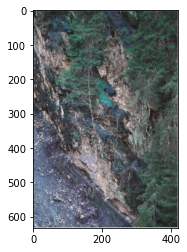

In [4]:
img = cv2.imread('Rainer_imgC.png')
plt.imshow(img)

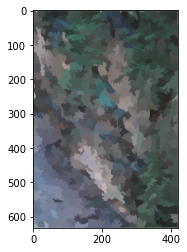

In [5]:
#denoise and average pixels
image_slic = seg.slic(img,n_segments=800) #n_segments is back proportional to the distance
labels = color.label2rgb(image_slic, img, kind='avg')
plt.imshow(labels)

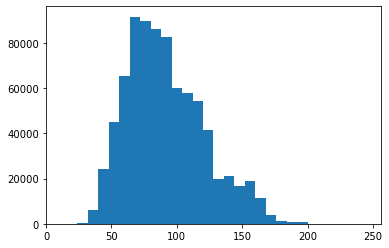

In [6]:
fig, ax = plt.subplots(1, 1)
ax.hist(labels.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

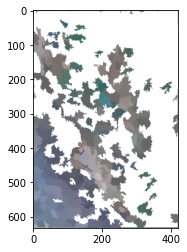

In [7]:
im = labels.copy() #remove the greens

im[np.all(im < (102, 102, 102), axis=-1)] = (255,255,255)
#define green to remove, here (102, 102, 102) and higher RGB, ref hist above
plt.imshow(im)

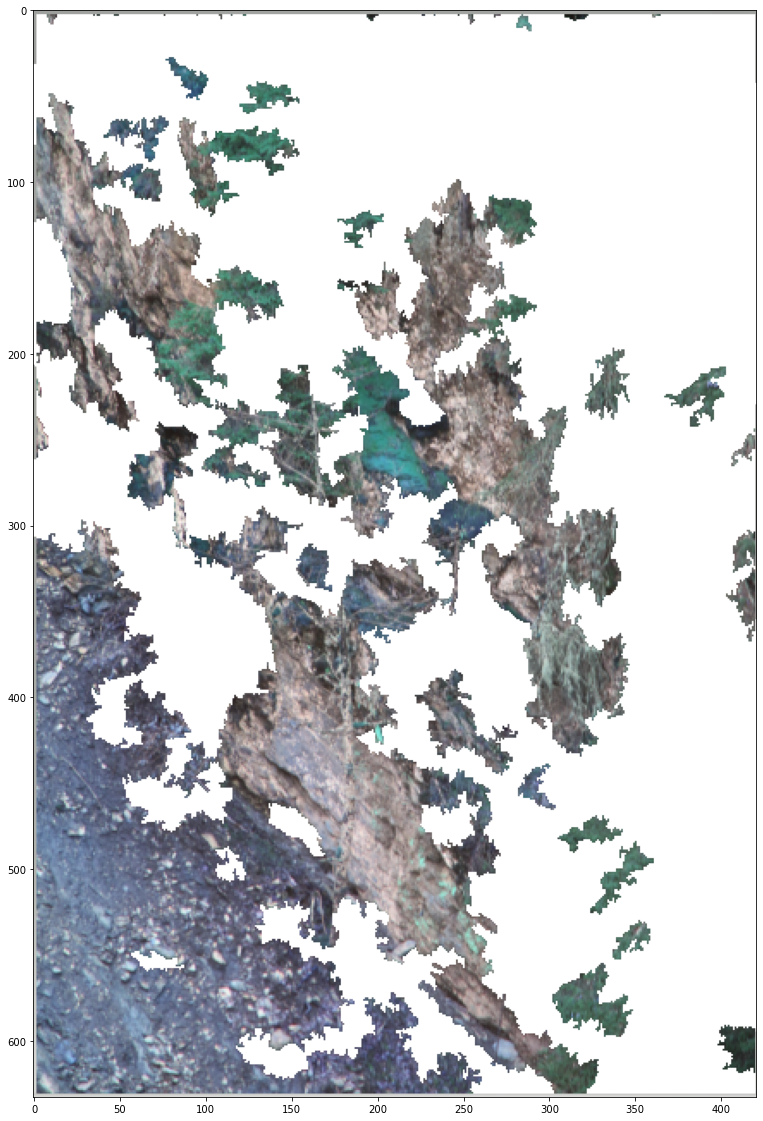

In [8]:
#apply the mask to the original image
mask = img.copy()
mask[np.all(im == (255, 255, 255), axis=-1)] = (255,255,255)

plt.figure(figsize = (20,20))
plt.imshow(mask)